In [1]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause (C) INRIA 2011

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D


In [2]:
X, color = datasets.make_swiss_roll(n_samples=1500)
print("Computing LLE embedding")
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=12, n_components=2)
print("Done. Reconstruction error: %g" % err)

Computing LLE embedding
Done. Reconstruction error: 1.37771e-07


In [3]:
print("Computing PCA")
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(X)

Computing PCA


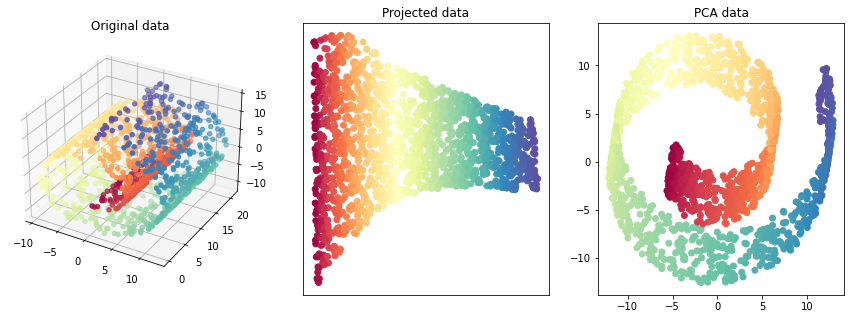

In [4]:
# ----------------------------------------------------------------------
# Plot result

fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(131, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")

ax = fig.add_subplot(132)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral)
plt.xticks([]), plt.yticks([])
plt.title("Projected data")

ax = fig.add_subplot(133)
ax.scatter(x_reduced[:, 0], x_reduced[:, 1], c=color, cmap=plt.cm.Spectral)
ax.set_title("PCA data")
plt.show()

In [5]:
print("Computing RBF PCA")
rbfpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
x_reduced_rbf = rbfpca.fit_transform(X)
print("Computing Sigmoid PCA")
sigpca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.001)
x_reduced_sig = sigpca.fit_transform(X)

Computing RBF PCA
Computing Sigmoid PCA


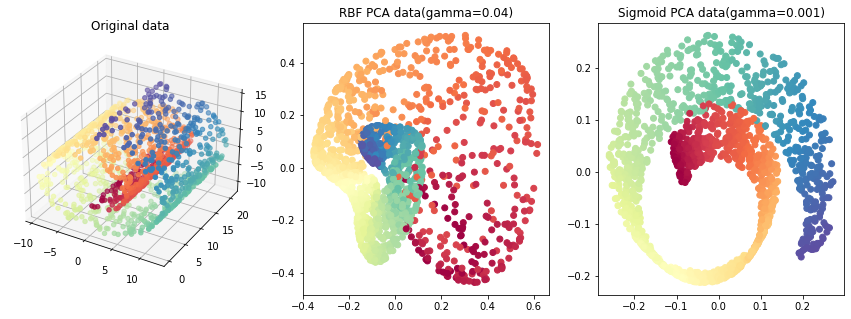

In [6]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(131, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")

ax = fig.add_subplot(132)
ax.scatter(x_reduced_rbf[:, 0], x_reduced_rbf[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("RBF PCA data(gamma=0.04)")

ax = fig.add_subplot(133)
ax.scatter(x_reduced_sig[:, 0], x_reduced_sig[:, 1], c=color, cmap=plt.cm.Spectral)
ax.set_title("Sigmoid PCA data(gamma=0.001)")
plt.show()

In [7]:
print("Computing isomap")
isomap = manifold.Isomap(n_components=2, n_neighbors=8)
x_reduced_isomap = isomap.fit_transform(X)
print("Computing Sigmoid PCA")
tsne = manifold.TSNE(n_components=2)
x_reduced_tsne = tsne.fit_transform(X)

Computing isomap
Computing Sigmoid PCA


/Users/leonjye/miniforge3/envs/py39t/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/leonjye/miniforge3/envs/py39t/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


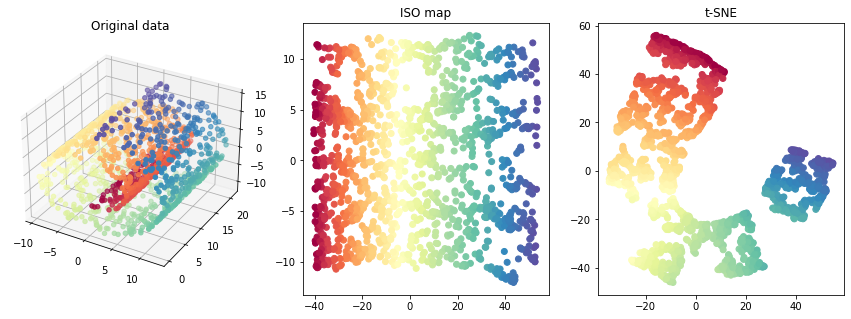

In [8]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(131, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")

ax = fig.add_subplot(132)
ax.scatter(x_reduced_isomap[:, 0], x_reduced_isomap[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("ISO map")

ax = fig.add_subplot(133)
ax.scatter(x_reduced_tsne[:, 0], x_reduced_tsne[:, 1], c=color, cmap=plt.cm.Spectral)
ax.set_title("t-SNE")
plt.show()